In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import pandas as pd
import os 
import shutil

In [4]:
path = untar_data(URLs.FLOWERS)

In [5]:
os.chdir(path)

In [5]:
train_df = pd.read_csv('test.txt',sep = ' ',header = None)

In [6]:
train_df.head()

,0,1
0,jpg/image_06977.jpg,34
1,jpg/image_00800.jpg,80
2,jpg/image_05038.jpg,58
3,jpg/image_06759.jpg,0
4,jpg/image_01133.jpg,45


In [7]:
flower_names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

In [8]:
k = 0
for c in train_df[1]:
  for i in range(len(flower_names)):
    if c == i:
      train_df.iloc[k,1] = flower_names[i]
  k+=1

In [9]:
train_df.tail(20)

,0,1
6129,jpg/image_07089.jpg,globe thistle
6130,jpg/image_01865.jpg,lotus
6131,jpg/image_05390.jpg,pincushion flower
6132,jpg/image_02551.jpg,morning glory
6133,jpg/image_02926.jpg,pink-yellow dahlia
6134,jpg/image_01358.jpg,petunia
6135,jpg/image_04077.jpg,colt's foot
6136,jpg/image_03914.jpg,petunia
6137,jpg/image_01022.jpg,wallflower
6138,jpg/image_02925.jpg,pink-yellow dahlia


In [10]:
os.mkdir('train')

FileExistsError: [Errno 17] File exists: 'train'

In [12]:
k = 0
for c in train_df[1]:
  if not os.path.exists('train/'+str(c)):
    os.mkdir('train/'+str(c))
  sep_file = train_df.iloc[k,0].split('/',1)[1]
  shutil.move(train_df.iloc[k,0],'train/'+str(c)+'/'+sep_file)
  k+=1

In [13]:
valid_df = pd.read_csv('valid.txt',sep = ' ',header = None)

In [14]:
k = 0
for c in valid_df[1]:
  for i in range(len(flower_names)):
    if c == i:
      valid_df.iloc[k,1] = flower_names[i]
  k+=1

In [15]:
valid_df.tail()

,0,1
1015,jpg/image_08182.jpg,japanese anemone
1016,jpg/image_07029.jpg,siam tulip
1017,jpg/image_05956.jpg,bearded iris
1018,jpg/image_06051.jpg,spear thistle
1019,jpg/image_07724.jpg,mallow


In [16]:
os.mkdir('valid')

In [17]:
k = 0
for c in valid_df[1]:
  if not os.path.exists('valid/'+str(c)):
    os.mkdir('valid/'+str(c))
  sep_file = valid_df.iloc[k,0].split('/',1)[1]
  shutil.move(valid_df.iloc[k,0],'valid/'+str(c)+'/'+sep_file)
  k+=1

In [11]:
valid_df_2 = pd.read_csv('train.txt',sep = ' ',header = None)

In [12]:
k = 0
for c in valid_df_2[1]:
  if not os.path.exists('valid/'+str(c)):
    os.mkdir('valid/'+str(c))
  sep_file = valid_df_2.iloc[k,0].split('/',1)[1]
  shutil.move(valid_df_2.iloc[k,0],'valid/'+str(c)+'/'+sep_file)
  k+=1

In [6]:
tfms = get_transforms(do_flip=True)

In [7]:
data = ImageDataBunch.from_folder(path,ds_tfms = tfms,size = 224,bs = 32)

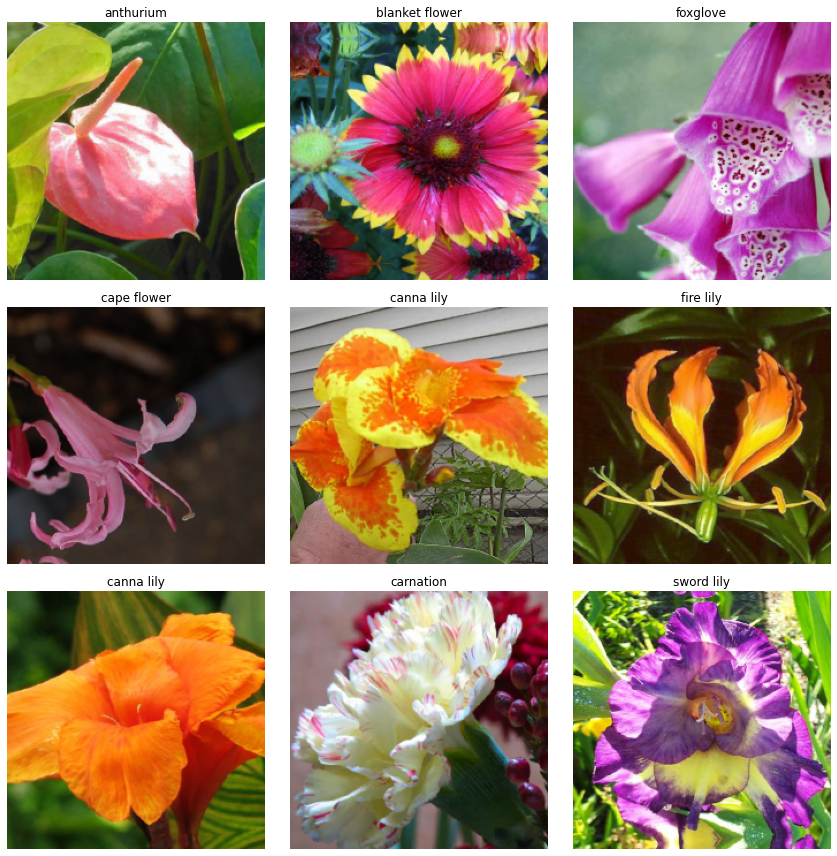

In [8]:
data.show_batch(3,fig_size = (6,7))

In [9]:
learner = cnn_learner(data,models.resnet34,metrics = accuracy)

In [56]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.641248,0.703224,0.805882,00:52
1,0.636426,0.348551,0.895588,00:53
2,0.370267,0.289290,0.915196,00:51


In [59]:
learner.save('Stage-1')

In [60]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


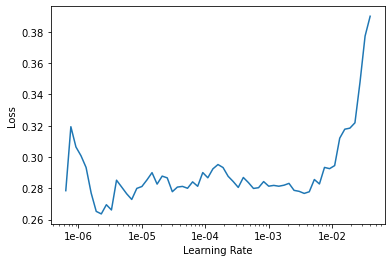

In [61]:
learner.recorder.plot()

In [43]:
learner.unfreeze()

In [62]:
learner.fit_one_cycle(3,max_lr=slice(8e-5,9e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.306019,0.253962,0.924020,00:52
1,0.260927,0.227743,0.933824,00:51
2,0.196067,0.214295,0.937745,00:52


In [63]:
learner.save('stage-2')

In [64]:
learner.unfreeze()

In [65]:
learner.fit_one_cycle(5,max_lr = slice(5e-05,8e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.273636,0.462424,0.870098,01:11
1,0.400301,0.354654,0.902451,01:11
2,0.214575,0.199526,0.943627,01:12
3,0.096907,0.137231,0.965686,01:11
4,0.043851,0.119478,0.966667,01:11


In [66]:
learner.save('stage-3')

In [67]:
learner.export()

In [69]:
os.getcwd()

'/storage/data/oxford-102-flowers'